In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Example

In [2]:
# Downloading NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = "This is a sample sentence, demonstrating the removal of stopwords and punctuation!"

# Tokenization
tokens = word_tokenize(text)

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove punctuation
tokens = [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
additional_stops = ['arafed', 'araffed', 'araffe', 'woman']
for word in additional_stops:
    stop_words.add(word)
    
tokens = [word for word in tokens if not word in stop_words]

# Rejoin tokens into a string
cleaned_text = ' '.join(tokens)

print(cleaned_text)

sample sentence demonstrating removal stopwords punctuation


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import data

In [3]:
import pandas as pd
import numpy as np
df = pd.read_excel('../data/dataframe_captions.xlsx')
df.head()

,Unnamed: 0,posts,caption,Long,id,Short,link,Objectify (yes or no)
0,0,2013-10-08_12-40-36_UTC.txt,Valentina Vignali looks explosive in a preciou...,2013-10-08_12-40-36_UTC,216,fNO52Nxluy,https://www.instagram.com/p/fNO52Nxluy/?igshid...,1
1,1,2014-03-21_10-14-52_UTC.txt,Regram @nimabenati #amenstyle #amen #fashion #...,2014-03-21_10-14-52_UTC,217,lzQl_gRlnD,https://www.instagram.com/p/lzQl_gRlnD/?igshid...,1
2,2,2014-04-12_09-13-03_UTC.txt,RG @nimabenati #amencouture amenstyle.com\n,2014-04-12_09-13-03_UTC,215,mrzAb-Rlkt,https://www.instagram.com/p/mrzAb-Rlkt/?igshid...,1
3,3,2015-06-01_07-45-08_UTC.txt,@emastokholma in Amen embroidered #dress from ...,2015-06-01_07-45-08_UTC,214,3YO1o0Rlkt,https://www.instagram.com/p/3YO1o0Rlkt/?igshid...,1
4,4,2015-07-06_10-38-30_UTC.txt,Stunning DJ @emastokholma wears all over paill...,2015-07-06_10-38-30_UTC,213,4yqgDyxloK,https://www.instagram.com/p/4yqgDyxloK/?igshid...,1


## Clean data

In [4]:
clean_text = []
for row in df['caption']:
    text = row
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    additional_stops = ['arafed', 'araffed', 'araffe', 'woman']
    for word in additional_stops:
        stop_words.add(word)
    tokens = [word for word in tokens if not word in stop_words]
    
    # Rejoin tokens into a string
    cleaned_text = ' '.join(tokens)
    clean_text.append(cleaned_text)

In [5]:
df['clean_text'] = clean_text

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
# Assuming df is your DataFrame and 'text_column' is the column with text
text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = None,
                      min_font_size = 10).generate(text)

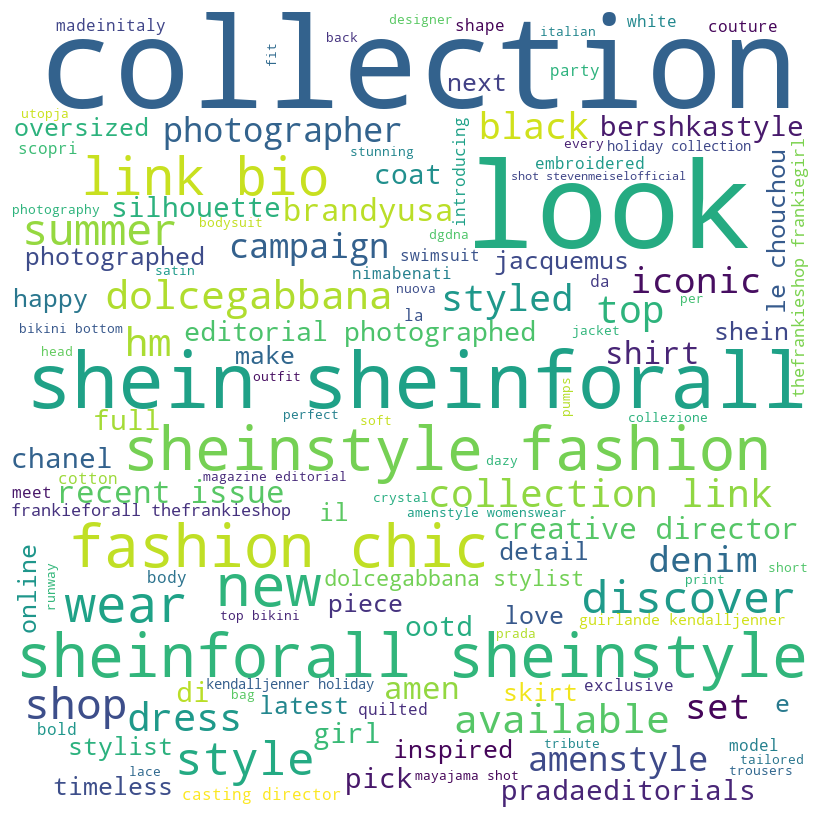

In [8]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


collection 59
fashion 54
shein 49
chic 38
sheinforall 38
sheinstyle 37
new 35
link 30
bio 28
dolcegabbana 28


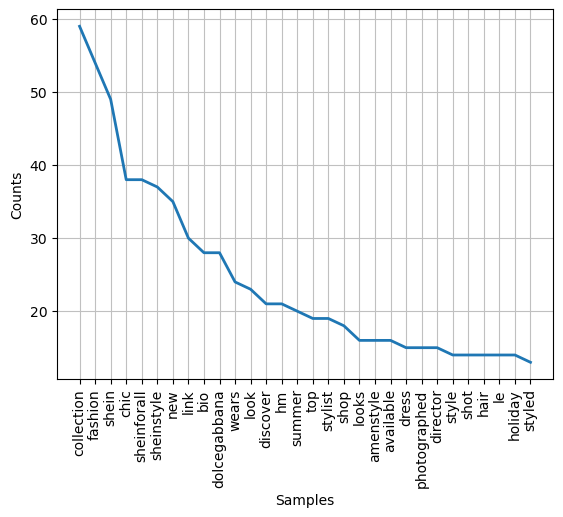

In [9]:
from nltk.probability import FreqDist


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = ' '.join(df['clean_text'])

# Tokenization
tokens = word_tokenize(text)

# Optional: Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
additional_stops = ['arafed', 'araffed', 'araffe', 'woman', 'picture']
for word in additional_stops:
    stop_words.add(word)
tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Frequency distribution
freq_dist = FreqDist(tokens)

# Display most common words
for word, frequency in freq_dist.most_common(10):
    print(word, frequency)

# Plot frequency distribution
freq_dist.plot(30, cumulative=False)
plt.show()

### Processing POS

In [10]:
%run ../labs/cleaning_mod.py

In [11]:
# superficial cleaning
df['text_sup_clean'] = df['caption'].apply(superficial_cleaning)

# deep cleaning
POS_KEEP = ["ADJ","ADV","NOUN","PROPN","VERB","NUM"] # we do not include "PRON"
df['text_deep_clean'] = df['text_sup_clean'].apply(deep_cleaning)
df['text_deep_clean_pos'] = df['text_sup_clean'].apply(deep_cleaning_pos)

# extract hashtags (if present)
df['hashtags'] = df['caption'].apply(get_hashtags)

# display the result
display(df)

C:\Users\danie\Documents\GitHub\network_science\labs\cleaning_mod.py:156: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")


,Unnamed: 0,posts,caption,Long,id,Short,link,Objectify (yes or no),clean_text,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags
0,0,2013-10-08_12-40-36_UTC.txt,Valentina Vignali looks explosive in a preciou...,2013-10-08_12-40-36_UTC,216,fNO52Nxluy,https://www.instagram.com/p/fNO52Nxluy/?igshid...,1,valentina vignali looks explosive precious cou...,valentina vignali looks explosive in a preciou...,valentina vignali look explosive precious cout...,"[valentina PROPN, vignali PROPN, look VERB, ex...",[]
1,1,2014-03-21_10-14-52_UTC.txt,Regram @nimabenati #amenstyle #amen #fashion #...,2014-03-21_10-14-52_UTC,217,lzQl_gRlnD,https://www.instagram.com/p/lzQl_gRlnD/?igshid...,1,regram nimabenati amenstyle amen fashion nimab...,regram,regram,[regram PROPN],"[amenstyle, amen, fashion, nimabenati, amazing]"
2,2,2014-04-12_09-13-03_UTC.txt,RG @nimabenati #amencouture amenstyle.com\n,2014-04-12_09-13-03_UTC,215,mrzAb-Rlkt,https://www.instagram.com/p/mrzAb-Rlkt/?igshid...,1,rg nimabenati amencouture,rg,,[],[amencouture]
3,3,2015-06-01_07-45-08_UTC.txt,@emastokholma in Amen embroidered #dress from ...,2015-06-01_07-45-08_UTC,214,3YO1o0Rlkt,https://www.instagram.com/p/3YO1o0Rlkt/?igshid...,1,emastokholma amen embroidered dress collection...,in amen embroidered from the spring summer co...,embroider spring summer collection discover more,"[embroider VERB, spring NOUN, summer NOUN, col...","[dress, amenstyle, ss15, emastokholma, ootd]"
4,4,2015-07-06_10-38-30_UTC.txt,Stunning DJ @emastokholma wears all over paill...,2015-07-06_10-38-30_UTC,213,4yqgDyxloK,https://www.instagram.com/p/4yqgDyxloK/?igshid...,1,stunning dj emastokholma wears paillettes dres...,stunning dj wears all over paillettes dress fr...,stunning dj wear all paillette dress last ss c...,"[stunning ADJ, dj ADV, wear NOUN, all ADV, pai...","[dj, amenstyle, ss15, womenswear, ootd, emasto..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,274,2023-12-04_15-38-40_UTC.txt,Already set up a snowy weekend with your frien...,2023-12-04_15-38-40_UTC,80,C0b7pbjscVJ,https://www.instagram.com/p/C0b7pbjscVJ/?img_i...,0,already set snowy weekend friends scout wearsc...,already set up a snowy weekend with your friends,already set snowy weekend friend,"[already ADV, set VERB, snowy ADJ, weekend NOU...","[scout, wearscout, winter]"
275,275,2023-12-05_11-13-44_UTC.txt,Suki Waterhouse wears H&M Studio Holiday Capsu...,2023-12-05_11-13-44_UTC,75,C0eCH7dKb3V,https://www.instagram.com/p/C0eCH7dKb3V/?img_i...,0,suki waterhouse wears h studio holiday capsule...,suki waterhouse wears h m studio holiday capsu...,suki waterhouse wear h m studio holiday capsul...,"[suki PROPN, waterhouse PROPN, wear VERB, h PR...","[hm, hmstudio]"
276,276,2023-12-05_13-59-58_UTC.txt,"The more oversized, the better, in our opinion...",2023-12-05_13-59-58_UTC,230,C0eVJZTMOSm,https://www.instagram.com/p/C0eVJZTMOSm/?utm_s...,1,oversized better opinion meet new bold billie ...,the more oversized the better in our opinion m...,more oversized well opinion meet new bold bill...,"[more ADV, oversized ADJ, well ADJ, opinion NO...","[frankieforall, thefrankieshop, frankiegirl]"
277,277,2023-12-05_17-00-34_UTC.txt,"Get in, ICON, we're going shopping 💃🚗✨\n\n🔎178...",2023-12-05_17-00-34_UTC,136,C0ep0HMB_3p,https://www.instagram.com/p/C0ep0HMB_3p/?utm_s...,1,get icon going shopping shein sheinforall shei...,get in icon we are going shopping,get icon go shop,"[get VERB, icon NOUN, go VERB, shop VERB]","[shein, sheinforall, sheinstyle, fashion, chic]"


### Get Text Only after cleaning

In [12]:
custom_stops = ['arafed', 'araffed', 'araffe', 'woman', 'picture']
all_words_joined = []

for cell in df['text_deep_clean_pos']:
    list_of_strings = list(cell)
    # Iterate over the list, split each string, and keep the first word
    words_afters_pos_tagging = [s.split()[0] for s in list_of_strings]
    
    # Join the first words into a single string
    single_words_pos_tagging = ' '.join(words_afters_pos_tagging)
    for string in custom_stops:
        single_words_pos_tagging = single_words_pos_tagging.replace(string, '')
   
    all_words_joined.append(single_words_pos_tagging)
df['text_deep_clean_pos_str'] = all_words_joined
df.head()

,Unnamed: 0,posts,caption,Long,id,Short,link,Objectify (yes or no),clean_text,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags,text_deep_clean_pos_str
0,0,2013-10-08_12-40-36_UTC.txt,Valentina Vignali looks explosive in a preciou...,2013-10-08_12-40-36_UTC,216,fNO52Nxluy,https://www.instagram.com/p/fNO52Nxluy/?igshid...,1,valentina vignali looks explosive precious cou...,valentina vignali looks explosive in a preciou...,valentina vignali look explosive precious cout...,"[valentina PROPN, vignali PROPN, look VERB, ex...",[],valentina vignali look explosive precious cout...
1,1,2014-03-21_10-14-52_UTC.txt,Regram @nimabenati #amenstyle #amen #fashion #...,2014-03-21_10-14-52_UTC,217,lzQl_gRlnD,https://www.instagram.com/p/lzQl_gRlnD/?igshid...,1,regram nimabenati amenstyle amen fashion nimab...,regram,regram,[regram PROPN],"[amenstyle, amen, fashion, nimabenati, amazing]",regram
2,2,2014-04-12_09-13-03_UTC.txt,RG @nimabenati #amencouture amenstyle.com\n,2014-04-12_09-13-03_UTC,215,mrzAb-Rlkt,https://www.instagram.com/p/mrzAb-Rlkt/?igshid...,1,rg nimabenati amencouture,rg,,[],[amencouture],
3,3,2015-06-01_07-45-08_UTC.txt,@emastokholma in Amen embroidered #dress from ...,2015-06-01_07-45-08_UTC,214,3YO1o0Rlkt,https://www.instagram.com/p/3YO1o0Rlkt/?igshid...,1,emastokholma amen embroidered dress collection...,in amen embroidered from the spring summer co...,embroider spring summer collection discover more,"[embroider VERB, spring NOUN, summer NOUN, col...","[dress, amenstyle, ss15, emastokholma, ootd]",embroider spring summer collection discover more
4,4,2015-07-06_10-38-30_UTC.txt,Stunning DJ @emastokholma wears all over paill...,2015-07-06_10-38-30_UTC,213,4yqgDyxloK,https://www.instagram.com/p/4yqgDyxloK/?igshid...,1,stunning dj emastokholma wears paillettes dres...,stunning dj wears all over paillettes dress fr...,stunning dj wear all paillette dress last ss c...,"[stunning ADJ, dj ADV, wear NOUN, all ADV, pai...","[dj, amenstyle, ss15, womenswear, ootd, emasto...",stunning dj wear all paillette dress last ss c...


### Save

In [14]:
df.to_excel('../data/captions_clean.xlsx', index = False)